<h1>TEAM NAME: ADANSO

    
<h3>Team Members:<br><br>
1. Adarsh Anand <br>
2. Aniket Chaudhri <br>
3. Somesh Agrawal

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [2]:
import matplotlib.image as img

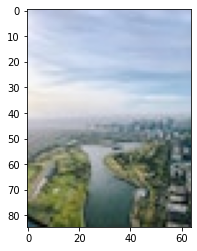

In [3]:
image = img.imread("city.jpg")
plt.imshow(image)

In [4]:
features = np.float32(image.reshape(-1,3))
df = pd.DataFrame(features)
df

,0,1,2
0,211.0,218.0,234.0
1,206.0,213.0,231.0
2,199.0,206.0,225.0
3,194.0,200.0,224.0
4,190.0,197.0,223.0
...,...,...,...
5435,91.0,98.0,91.0
5436,78.0,85.0,78.0
5437,91.0,97.0,93.0
5438,92.0,96.0,97.0


In [5]:
def distance(x, centroid):
    # Compute the difference, following by raising to power 2 and summing
    return np.sqrt((np.square(np.array(x1) - np.array(x2))).sum())

In [6]:
def Estep(X, centroids):
    
    distance= np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    
    final_labels = np.argmin(distance, axis=1)

    return final_labels

In [7]:
def Mstep(X,centroids,labels):
    K = centroids.shape[0]
    for k in range(K):
        centroids[k, :] = np.mean(X[labels == k, :], axis=0)
    return centroids

In [8]:
def convergence(prev_centroid, new_centroid):
    return np.linalg.norm(prev_centroid - new_centroid)

In [9]:
def CostFn(X,centroids,labels):
    K = centroids.shape[0]
    J=0
    for k in range(K):
        Xk= X[labels ==k]
        centroid = centroids[k]
        J+= np.sum(np.linalg.norm(Xk - centroid, axis=1))
    return J

In [10]:
def Kmeans(X,K):
    e = 0.000001
   
    mu= np.array(df.sample(K))
    prev_mu = np.array(df.sample(K))
    
    counter = 0
    J = []
    while(convergence(prev_mu,mu)>e):
        counter+=1
        prev_mu=copy.deepcopy(mu)
        
        labels = Estep(X,mu).astype(int)
        J.append(CostFn(X,mu,labels))   
        
        
        mu = Mstep(X, mu,labels)
        J.append(CostFn(X,mu,labels))   

    return labels, mu

In [11]:
def segmentImage(df,K):
  X = df.values
  labels, centroids = Kmeans(X,K)
  centroids = np.uint8(centroids)
  labels=np.uint8(labels)
  segmented_pixels = centroids[labels.flatten()]
  segmented_image = segmented_pixels.reshape((image.shape))
  return segmented_image

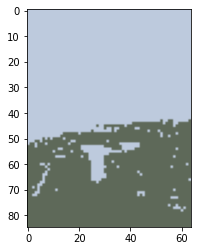

In [14]:
plt.imshow(segmentImage(df,2))

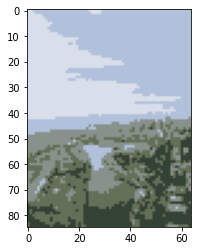

In [15]:
plt.imshow(segmentImage(df,5))

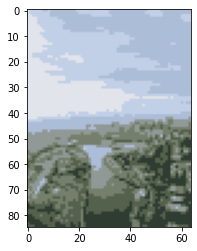

In [16]:
plt.imshow(segmentImage(df,7))

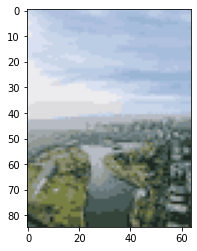

In [17]:
plt.imshow(segmentImage(df,20))

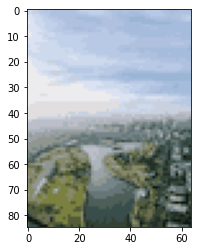

In [19]:
plt.imshow(segmentImage(df,25))